In [1]:
%matplotlib inline


Gaussian HMM of stock data
--------------------------

This script shows how to use Gaussian HMM on stock price data from
Yahoo! finance. For more information on how to visualize stock prices
with matplotlib, please refer to ``date_demo1.py`` of matplotlib.


In [3]:
from __future__ import print_function

import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM


print(__doc__)

Automatically created module for IPython interactive environment


Get quotes from Yahoo! finance


In [4]:
quotes = quotes_historical_yahoo_ochl(
    "INTC", datetime.date(1995, 1, 1), datetime.date(2012, 1, 6))

# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

In [8]:
X

array([[ -5.42400000e-03,   4.18656000e+07],
       [  2.16950000e-02,   6.04800000e+07],
       [  3.79680000e-02,   5.63168000e+07],
       ..., 
       [  4.86184000e-01,   4.75040000e+07],
       [  2.47356000e-01,   4.94906000e+07],
       [ -1.27943000e-01,   3.63435000e+07]])

Run Gaussian HMM


In [5]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/bin/anaconda/lib/python2.7/site-pack

fitting to HMM and decoding ...done


Print trained parameters and plot


Transition matrix
[[  8.83404795e-01   3.25252547e-03   6.90817133e-04   1.12651863e-01]
 [  2.72109537e-03   9.79217684e-01   1.80612207e-02   3.55507857e-15]
 [  1.91419355e-18   1.18929358e-01   4.60954972e-01   4.20115670e-01]
 [  1.85142553e-01   1.21602692e-12   4.13522626e-02   7.73505185e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  7.80605101e-03   5.43200241e+07]
var =  [  5.17331393e-02   1.54645694e+14]

1th hidden state
mean =  [  2.36832327e-02   4.97390962e+07]
var =  [  7.18438789e-01   2.49469105e+14]

2th hidden state
mean =  [ -3.59064272e-01   1.53097424e+08]
var =  [  2.63469579e+00   5.88896756e+15]

3th hidden state
mean =  [  2.15771398e-02   8.82100130e+07]
var =  [  1.22253606e-01   5.64902264e+14]



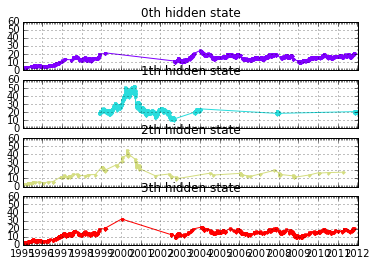

In [6]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

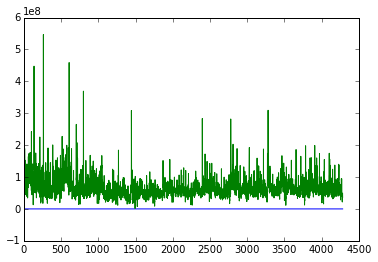

In [9]:
plt.plot(X)

In [10]:
X

array([[ -5.42400000e-03,   4.18656000e+07],
       [  2.16950000e-02,   6.04800000e+07],
       [  3.79680000e-02,   5.63168000e+07],
       ..., 
       [  4.86184000e-01,   4.75040000e+07],
       [  2.47356000e-01,   4.94906000e+07],
       [ -1.27943000e-01,   3.63435000e+07]])